## Machine Learning
#### Customer Segmentation Using Clustering
###### Aditya Hajare | https://www.linkedin.com/in/aditya-hajare

In [63]:
import warnings 
warnings.filterwarnings('ignore') 

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm


%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# load the data and print
csv_data = pd.read_csv( "book_readers_data.csv" ) 

csv_data.head()

,Age,Sex,Race,Marital status?,Education,Employement,Incomes,How many books did you read during last 12months?,Read any printed books during last 12months?,Read any audiobooks during last 12months?,Read any e-books during last 12months?,"Last book you read, you…",Do you happen to read any daily news or newspapers?,Do you happen to read any magazines or journals?
0,66,Male,Refused,Divorced,College graduate,Retired,"$20,000 to under $30,000",97,Yes,No,Yes,Purchased the book,No,Yes
1,46,Male,Native American/American Indian,Married,High school graduate,Employed full-time,"Less than $10,000",97,Yes,Yes,Yes,Purchased the book,Yes,Yes
2,32,Male,Mixed race,Never been married,High school graduate,Employed full-time,"Less than $10,000",97,No,Yes,Yes,Borrowed the book from a friend or family member,Yes,Yes
3,27,Male,Mixed race,Married,High school graduate,Employed full-time,"$40,000 to under $50,000",97,Yes,No,Yes,Borrowed the book from a library,Yes,No
4,16,Female,Mixed race,Never been married,High school incomplete,Employed part-time,"$10,000 to under $20,000",97,Yes,Yes,No,Purchased the book,Yes,No


In [64]:
csv_data.columns

Index(['Age', 'Sex', 'Race', 'Marital status?', 'Education', 'Employement',
       'Incomes', 'How many books did you read during last 12months?',
       'Read any printed books during last 12months?',
       'Read any audiobooks during last 12months?',
       'Read any e-books during last 12months?', 'Last book you read, you…',
       'Do you happen to read any daily news or newspapers?',
       'Do you happen to read any magazines or journals?'],
      dtype='object')

In [65]:
csv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2832 entries, 0 to 2831
Data columns (total 14 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   Age                                                  2832 non-null   int64 
 1   Sex                                                  2832 non-null   object
 2   Race                                                 2832 non-null   object
 3   Marital status?                                      2832 non-null   object
 4   Education                                            2832 non-null   object
 5   Employement                                          2832 non-null   object
 6   Incomes                                              2832 non-null   object
 7   How many books did you read during last 12months?    2832 non-null   int64 
 8   Read any printed books during last 12months?         2442 non-null   object
 9

In [66]:
import datetime
import re

def col_quick_rename(data):
    cols = []

    for col_name in data.columns:
        cleaned = re.sub(r'[^\w\s]', '', col_name) 
        split = re.findall('[A-Z][^A-Z]*', cleaned)

        if split:
            new_name = ""

            for index,substr in enumerate(split):
                if index!=0:
                    new_name+="_"+substr.lower()
                else:
                    new_name = substr.lower()

            cols.append(new_name)

    data.columns = cols

    return data

csv_data = col_quick_rename(csv_data)
csv_data.columns = ["age", "sex", "race", "marital_status", "education", "employement", "incomes", "books_12m", "printbooks_12m", "audiobooks_12m", "ebooks_12m", "last_book", "daily_or_newspaper", "mag_journals"]

In [67]:
csv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2832 entries, 0 to 2831
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 2832 non-null   int64 
 1   sex                 2832 non-null   object
 2   race                2832 non-null   object
 3   marital_status      2832 non-null   object
 4   education           2832 non-null   object
 5   employement         2832 non-null   object
 6   incomes             2832 non-null   object
 7   books_12m           2832 non-null   int64 
 8   printbooks_12m      2442 non-null   object
 9   audiobooks_12m      2442 non-null   object
 10  ebooks_12m          2442 non-null   object
 11  last_book           2442 non-null   object
 12  daily_or_newspaper  2832 non-null   object
 13  mag_journals        2832 non-null   object
dtypes: int64(2), object(12)
memory usage: 309.9+ KB


In [68]:
def encode_feat(data):
    label_encoder = LabelEncoder()
    label_encoder.fit(data)
    return label_encoder.transform(data)

csv_data['sex'] = encode_feat(csv_data['sex'])
csv_data['race'] = encode_feat(csv_data['race'])
csv_data['marital_status'] = encode_feat(csv_data['marital_status'])
csv_data['education'] = encode_feat(csv_data['education'])
csv_data['employement'] = encode_feat(csv_data['employement'])

csv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2832 entries, 0 to 2831
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 2832 non-null   int64 
 1   sex                 2832 non-null   int64 
 2   race                2832 non-null   int64 
 3   marital_status      2832 non-null   int64 
 4   education           2832 non-null   int64 
 5   employement         2832 non-null   int64 
 6   incomes             2832 non-null   object
 7   books_12m           2832 non-null   int64 
 8   printbooks_12m      2442 non-null   object
 9   audiobooks_12m      2442 non-null   object
 10  ebooks_12m          2442 non-null   object
 11  last_book           2442 non-null   object
 12  daily_or_newspaper  2832 non-null   object
 13  mag_journals        2832 non-null   object
dtypes: int64(7), object(7)
memory usage: 309.9+ KB


In [69]:
csv_data['incomes'].value_counts()

$100,000 to under $150,000     530
$50,000 to under $75,000       394
$75,000 to under $100,000      316
Refused                        291
$30,000 to under $40,000       265
$20,000 to under $30,000       238
$10,000 to under $20,000       216
9$100,000 to under $150,000    212
$40,000 to under $50,000       207
Less than $10,000              163
Name: incomes, dtype: int64

In [70]:
idx = csv_data.index[csv_data["incomes"] == '9$100,000 to under $150,000' ].tolist()
csv_data.loc[idx]["incomes"] = "$100,000 to under $150,000"
csv_data.iloc[idx, csv_data.columns.get_loc('incomes')] = "$100,000 to under $150,000"


In [71]:
csv_data['incomes'].value_counts()

$100,000 to under $150,000    742
$50,000 to under $75,000      394
$75,000 to under $100,000     316
Refused                       291
$30,000 to under $40,000      265
$20,000 to under $30,000      238
$10,000 to under $20,000      216
$40,000 to under $50,000      207
Less than $10,000             163
Name: incomes, dtype: int64

In [72]:
# encode the education feature
le = LabelEncoder()
le.fit(csv_data['incomes'])
csv_data['incomes'] = le.transform(csv_data['incomes'])


In [73]:
csv_data['printbooks_12m'].value_counts()

Yes           2264
No             168
Don’t know      10
Name: printbooks_12m, dtype: int64

In [74]:
# encode the education feature
le = LabelEncoder()
csv_data['printbooks_12m'] = csv_data['printbooks_12m'].astype(str)

le.fit(csv_data['printbooks_12m'])
csv_data['printbooks_12m'] = le.transform(csv_data['printbooks_12m'])

In [75]:
csv_data['audiobooks_12m'].value_counts()

No            2027
Yes            411
Don’t know       4
Name: audiobooks_12m, dtype: int64

In [76]:
# encode the education feature
le = LabelEncoder()
csv_data['audiobooks_12m'] = csv_data['audiobooks_12m'].astype(str)

le.fit(csv_data['audiobooks_12m'])
csv_data['audiobooks_12m'] = le.transform(csv_data['audiobooks_12m'])

In [77]:
csv_data['ebooks_12m'].value_counts()

No            1641
Yes            787
Don’t know      14
Name: ebooks_12m, dtype: int64

In [78]:
# encode the education feature
le = LabelEncoder()
csv_data['ebooks_12m'] = csv_data['ebooks_12m'].astype(str)

le.fit(csv_data['ebooks_12m'])
csv_data['ebooks_12m'] = le.transform(csv_data['ebooks_12m'])

In [79]:
csv_data['last_book'].value_counts()

Purchased the book                                  1266
Borrowed the book from a friend or family member     501
Borrowed the book from a library                     335
Got the book some other way                          309
8                                                     25
9                                                      6
Name: last_book, dtype: int64

In [80]:
# encode the education feature
le = LabelEncoder()
csv_data['last_book'] = csv_data['last_book'].astype(str)

le.fit(csv_data['last_book'])
csv_data['last_book'] = le.transform(csv_data['last_book'])

In [81]:
csv_data['daily_or_newspaper'].value_counts()

Yes           1750
No            1077
Don’t know       5
Name: daily_or_newspaper, dtype: int64

In [82]:
# encode the education feature
le = LabelEncoder()
csv_data['daily_or_newspaper'] = csv_data['daily_or_newspaper'].astype(str)

le.fit(csv_data['daily_or_newspaper'])
csv_data['daily_or_newspaper'] = le.transform(csv_data['daily_or_newspaper'])

In [83]:
csv_data['mag_journals'].value_counts()

Yes           1506
No            1322
Don’t know       4
Name: mag_journals, dtype: int64

In [84]:
# encode the education feature
le = LabelEncoder()
csv_data['mag_journals'] = csv_data['mag_journals'].astype(str)

le.fit(csv_data['mag_journals'])
csv_data['mag_journals'] = le.transform(csv_data['mag_journals'])



In [85]:
csv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2832 entries, 0 to 2831
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   age                 2832 non-null   int64
 1   sex                 2832 non-null   int64
 2   race                2832 non-null   int64
 3   marital_status      2832 non-null   int64
 4   education           2832 non-null   int64
 5   employement         2832 non-null   int64
 6   incomes             2832 non-null   int64
 7   books_12m           2832 non-null   int64
 8   printbooks_12m      2832 non-null   int64
 9   audiobooks_12m      2832 non-null   int64
 10  ebooks_12m          2832 non-null   int64
 11  last_book           2832 non-null   int64
 12  daily_or_newspaper  2832 non-null   int64
 13  mag_journals        2832 non-null   int64
dtypes: int64(14)
memory usage: 309.9 KB


In [86]:
# list of all float columns
float_columns = [x for x in csv_data.columns if x not in ['sex','race','marital_status','education','employement','incomes','printbooks_12m','ebooks_12m','audiobooks_12m','last_book','daily_or_newspaper', 'mag_journals']]
print(float_columns)
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
scaled_data = csv_data.copy()
scaled_data[float_columns] = sc.fit_transform(csv_data[float_columns])
scaled_data.head(4)


['age', 'books_12m']


,age,sex,race,marital_status,education,employement,incomes,books_12m,printbooks_12m,audiobooks_12m,ebooks_12m,last_book,daily_or_newspaper,mag_journals
0,1.008689,1,6,0,0,6,2,3.399532,2,1,2,5,1,2
1,-0.068768,1,4,3,2,1,7,3.399532,2,2,2,5,2,2
2,-0.822987,1,3,4,2,1,7,3.399532,1,2,2,2,2,2
3,-1.092351,1,3,3,2,1,4,3.399532,2,1,2,3,2,1


In [87]:
from sklearn.cluster import KMeans

#from sklearn.cluster import cluster

km = KMeans(n_clusters=4,random_state = 42)
km.fit(scaled_data[float_columns])

# add kmeans_color column to the dataframe
csv_data['cluster'] = km.predict(scaled_data[float_columns])
csv_data.head()

,age,sex,race,marital_status,education,employement,incomes,books_12m,printbooks_12m,audiobooks_12m,ebooks_12m,last_book,daily_or_newspaper,mag_journals,cluster
0,66,1,6,0,0,6,2,97,2,1,2,5,1,2,2
1,46,1,4,3,2,1,7,97,2,2,2,5,2,2,2
2,32,1,3,4,2,1,7,97,1,2,2,2,2,2,2
3,27,1,3,3,2,1,4,97,2,1,2,3,2,1,2
4,16,0,3,4,3,2,0,97,2,2,1,5,2,1,2


In [88]:

print(csv_data.cluster.value_counts())


3    954
1    847
0    742
2    289
Name: cluster, dtype: int64


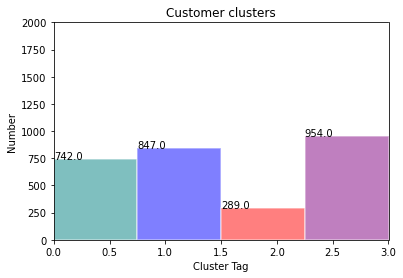

In [89]:
n, bins, patches = plt.hist(csv_data['cluster'], 4, facecolor='blue',alpha=0.5,edgecolor='white', linewidth=1.5)

plt.xlabel('Cluster Tag')
plt.ylabel('Number')
plt.title(r'Customer clusters')

for i in range(0,1):
    patches[i].set_facecolor('teal')
for i in range(1,2):    
    patches[i].set_facecolor('blue')
for i in range(2, 3):
    patches[i].set_facecolor('red')
for i in range(3, len(patches)):
    patches[i].set_facecolor('purple')

for i in range(4):
    plt.text(bins[i],n[i],str(n[i]))
    
plt.axis([0, 3, 0, 2000])
# Tweak spacing to prevent clipping of ylabel
# plt.subplots_adjust(left=0.15)
plt.show()


In [90]:
customer_summary = csv_data.groupby('cluster', as_index=False).agg(avg_age=('age', 'mean'),
                                                                       avg_book_read_last_12mon= ('books_12m','mean'),
                                                                       book_count = ('age', 'count'))
# apply background gradient
customer_summary.style.background_gradient()

,avg_age,avg_book_read_last_12mon,book_count
0,0,742,69.466307
1,1,847,25.453365
2,2,289,51.539792
3,3,954,48.101677
